- https://arxiv.org/abs/1906.04341

In [1]:
# !pip install bertviz

In [18]:
from bertviz import head_view, model_view
from transformers import BertTokenizer, BertModel

model_version = 'bert-base-uncased'
model = BertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_version)
sentence_a = "The cat sat on the mat."
sentence_b = "The cat lay on the rug."
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']
attention = model(input_ids, token_type_ids=token_type_ids)[-1]


In [3]:
# "num_attention_heads": 12,
# "num_hidden_layers": 12,
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_attentions": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.47.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [19]:
input_ids

tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,  1012,   102,  1996,
          4937,  3913,  2006,  1996, 20452,  1012,   102]])

In [20]:
tokenizer.decode([101, 102])

'[CLS] [SEP]'

In [21]:
token_type_ids

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

In [22]:
sentence_b_start = token_type_ids[0].tolist().index(1)
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list) 

In [23]:
sentence_b_start

9

In [26]:
# 交互式的可点击
model_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

In [24]:
# %matplotlib notebook
# layer 2, 第一个 head，attend to next token
head_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

In [10]:
attention[1].shape

torch.Size([1, 12, 15, 15])

<Axes: >

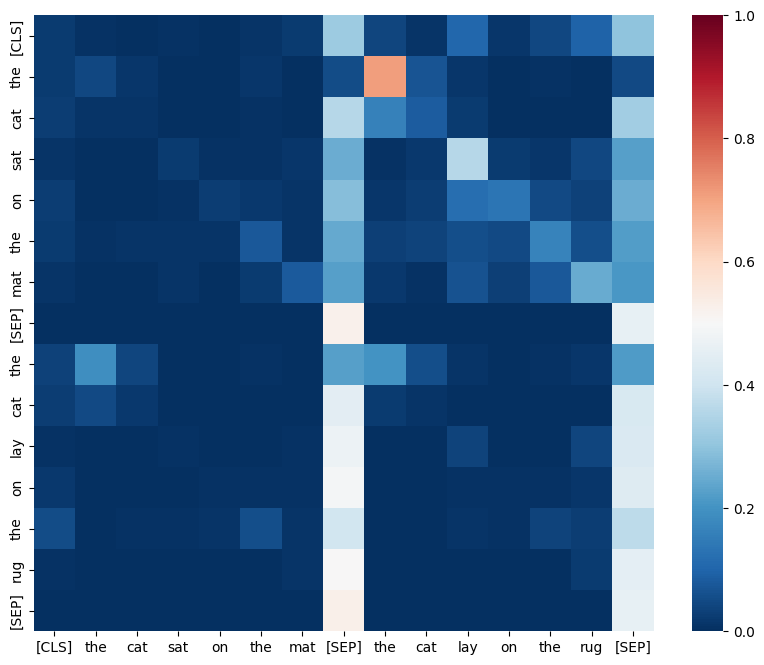

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

layer_index = 5
head_index = 5
specific_attention = attention[layer_index][0][head_index]  # shape: [seq_len, seq_len]

# 使用不同的配色方案和归一化
plt.figure(figsize=(10, 8))
sns.heatmap(
    specific_attention.detach().numpy(),
    xticklabels=tokens,
    yticklabels=tokens,
    cmap='RdBu_r',  # 红蓝对比配色
    center=0.5,     # 将0.5设为中心值
    vmin=0,
    vmax=1,
    # annot=True
)